In [271]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, laplace

In [272]:
param_files = ["exp_params.txt", "pair_params.txt", "peptide_params.txt"]
params = {}
for pf in param_files:
    pfp = os.path.join("/gd/Slavov_Lab/Albert/RTLib_Alignments/FP17_20180506_mu_norm_1", pf)
    if os.path.exists(pfp):
      with open(pfp, "rb") as f:
        try:
          params[pf.split("_")[0]] = pd.read_csv(pfp, sep="\t")
        except:
          print("some error")
params

{'exp':     exp_id    beta_0    beta_1    beta_2  sigma_intercept  sigma_slope  \
 0        0 -2.768855  1.096425  0.949272         0.057300     0.037514   
 1        1 -2.557878  1.091458  1.020115         0.038468     0.072863   
 2        2 -2.626336  1.093946  1.024447         0.047806     0.085287   
 3        3 -2.652446  1.082327  1.011744         0.047017     0.064729   
 4        4 -2.369707  1.075622  1.020687         0.064652     0.045021   
 5        5 -2.305204  1.071680  1.010001         0.037414     0.065037   
 6        6 -2.291254  1.072590  1.005242         0.054194     0.042130   
 7        7 -2.525119  1.081101  1.005285         0.036422     0.142289   
 8        8 -2.364390  1.075576  1.006760         0.043435     0.028719   
 9        9 -2.565751  1.082340  1.010537         0.026373     0.221127   
 10      10 -2.335743  1.078124  1.003573         0.055654     0.064746   
 
     split_point  
 0     25.886228  
 1     25.146031  
 2     25.099203  
 3     29.74776

In [273]:
dfa = pd.read_csv("/gd/SingleCell_Data/FP17/evidence_c.txt", sep='\t', low_memory=False)
dfa["id"] = range(0,dfa.shape[0])
dfa

,sequence,raw_file,retention_time,pep,exclude,input_id,exp_id,peptide_id,id
0,_AAAAAAALQAK_,180413S_X_FP17A,33.0840,4.478000e-04,False,0,0,0,0
1,_AAAAAAALQAK_,180413S_X_FP17B,33.6770,1.260500e-14,False,0,1,0,1
2,_AAAAAAALQAK_,180413S_X_FP17C,33.6900,2.534400e-06,False,0,2,0,2
3,_AAAAAAALQAK_,180413S_X_FP17F,33.5010,4.462100e-06,False,0,5,0,3
4,_AAAAAAALQAK_,180413S_X_FP17J,33.5420,8.286500e-04,False,0,9,0,4
5,_AAAAAK_,180413S_X_FP17A,20.6750,3.172800e-01,True,0,0,1,5
6,_AAAAAK_,180413S_X_FP17C,20.6720,4.668000e-01,True,0,2,1,6
7,_AAAAAK_,180413S_X_FP17D,20.5960,1.577900e-01,True,0,3,1,7
8,_AAAAAK_,180413S_X_FP17G,20.7230,1.577900e-01,True,0,6,1,8
9,_AAAAAK_,180413S_X_FP17H,20.7030,2.153600e-01,True,0,7,1,9


In [274]:
dff = dfa[-(dfa["exclude"])]
dff = dff.reset_index(drop=True)

num_experiments = dff["exp_id"].max() + 1
num_observations = dff.shape[0]
num_peptides = dff["peptide_id"].max() + 1
exp_names = dff["raw_file"].unique()
mean_log_rt = np.mean(np.log(dff["retention_time"]))
sd_log_rt = np.std(np.log(dff["retention_time"]))
max_rt = dff["retention_time"].max()
pep_id_list = dff["peptide_id"].unique()

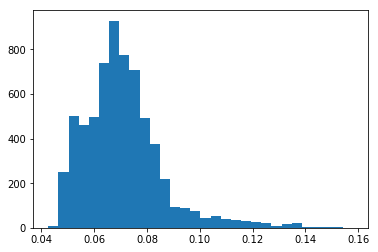

In [276]:
np.sort(dff["exp_id"].unique())[1:3]

plt.hist(params["pair"]["sigma_ij"], bins=30)
plt.show()

In [277]:
# output table
df_new = pd.DataFrame()

for i, e in enumerate(np.sort(dff["exp_id"].unique())):
    exp_name = exp_names[i]
    print(i, exp_name)
    
    exp = dfa[dfa["exp_id"]==e]
    exp = exp.reset_index(drop=True)
    
    # not all peptides in this experiment have data from the model
    # we can only update those that have that data. others will not be touched
    exp_matches = np.isin(exp["peptide_id"].values, pep_id_list)
    exp_f = exp[exp_matches]
    exp_f = exp_f.reset_index(drop=True)
    
    # convert peptide_id to stan_peptide_id
    exp_f["stan_peptide_id"] = exp_f["peptide_id"].map({ind: val for val, ind in enumerate(pep_id_list)})
    exp_peptides = exp_f["stan_peptide_id"].unique()
    exp_f["mu"] = params["peptide"]["mu"].values[exp_f["stan_peptide_id"]]
    
    def mu_to_muij(mu):
        if mu < params["exp"]["split_point"][i]:
            return params["exp"]["beta_0"][i] + (params["exp"]["beta_1"][i] * mu)
        else:
            return params["exp"]["beta_0"][i] + (params["exp"]["beta_1"][i] * params["exp"]["split_point"][i]) + (params["exp"]["beta_2"][i] * (mu - params["exp"]["split_point"][i]))
    
    exp_f["muij"] = exp_f["mu"].apply(mu_to_muij)
    exp_f["sigmaij"] = params["exp"]["sigma_intercept"][i] + params["exp"]["sigma_slope"][i] / 100 * exp_f["mu"]
    
    # PEP.new = P(-|RT) = P(RT|-)*P(-) / (P(RT|-)*P(-) + P(RT|+)*P(+)
    # + <- PSM=Correct
    # - <- PSM=Incorrect
    
    # P(RT|-) = probability of peptides RT, given that PSM is incorrect
    #           calculated from the uniform density from 0 to max(RT)
    #exp.rt.minus <- 1 / max(exp.f$`Retention time`) #experiment-specific
    
    # Fit3b+c, lognormal density over all retention times
    exp_dist = lognorm([sd_log_rt], loc=mean_log_rt)
    #exp_rt_minus = exp_dist.pdf(exp_f["retention_time"])
    exp_rt_minus = norm.pdf(exp_f["retention_time"], loc=np.mean(dff["retention_time"]), scale=np.std(dff["retention_time"]))
    
    # P(-) = probability that PSM is incorrect (PEP)
    # P(+) = probability that PSM is correct (1-PEP)
    
    # P(RT|+) = probability that given the correct ID, the RT falls in the
    #           lognormal distribution of RTs for that peptide, for that experiment
    #
    # this is defined in fit_RT3.stan as a mixture between the laplace and uniform distribution
    # where the laplace distribution is weighted by 1-PEP
    # and the uniform distribution is weighted by PEP
    # -- summing to a total density of 1
    def rt_plus(x):
        # ensure that pep does not exceed 1
        # will result in incorrect negative densities when applying mixture model
        pep = x["pep"]
        pep[pep > 1] = 1
        # Fit3c - mixture between lognormal density + normal
        comp1 = (pep) * exp_dist.pdf(x["retention_time"])
        comp2 = (1-pep) * norm.pdf(x["retention_time"], loc=x["muij"], scale=x["sigmaij"])
        y = comp1 + comp2
        return y.values.tolist()
    
    exp_rt_plus = exp_f.groupby("stan_peptide_id")[["retention_time", "muij", "sigmaij", "pep"]].apply(rt_plus).values.tolist()
    exp_rt_plus = np.array([st for row in exp_rt_plus for st in row])
    
    # sometimes rt.plus will go so low that it will round to 0
    # just round this back up to the smallest number R will handle
    exp_rt_plus[exp_rt_plus == 0] = np.finfo(float).eps

    exp_PEP = exp_f["pep"].values
    # sometimes MQ will output PEP > 1, which makes no sense, and will
    # result in negative values for our adjusted PEP
    # set all PEP > 1 to PEP = 1
    exp_PEP[exp_PEP > 1] = 1
    
    # now we can update the PEP
    # PEP.new = P(-|RT) = P(RT|-)*P(-) / (P(RT|-)*P(-) + P(RT|+)*P(+)
    # + <- PSM=Correct
    # - <- PSM=Incorrect
    pep_new = (exp_rt_minus * exp_PEP) / ((exp_rt_minus * exp_PEP) + (exp_rt_plus * (1 - exp_PEP)))
    
    exp_new = pd.DataFrame({
        "rt_minus": exp_rt_minus.tolist(),
        "rt_plus": exp_rt_plus.tolist(),
        "mu": exp_f["mu"].values.tolist(),
        "muij": exp_f["muij"].values.tolist(),
        "sigmaij": exp_f["sigmaij"].values.tolist(),
        "pep_new": pep_new.tolist(),
        "id": exp_f["id"]
    })
    exp_new = exp_new.append(pd.DataFrame({
        "rt_minus": np.nan,
        "rt_plus": np.nan,
        "mu": np.nan,
        "muij": np.nan,
        "sigmaij": np.nan,
        "pep_new": np.nan,
        "id": exp["id"][~(exp_matches)]
    }))
    
    df_new = df_new.append(exp_new)

df_new = df_new.sort_values("id")
df_new = df_new.reset_index(drop=True)

print(df_new)

0 180413S_X_FP17A
1 180413S_X_FP17B
2 180413S_X_FP17C
3 180413S_X_FP17F
4 180413S_X_FP17J
5 180413S_X_FP17D
6 180413S_X_FP17E
7 180413S_X_FP17G
8 180413S_X_FP17H
9 180413S_X_FP17I
10 180413S_X_FP17K
          id         mu       muij       pep_new  rt_minus       rt_plus  \
0          0  33.716354  33.046371  3.389109e-06  0.037317  4.932841e+00   
1          1  33.716354  33.630673  9.621202e-17  0.036874  4.831016e+00   
2          2  33.716354  33.658661  1.949647e-08  0.036863  4.791993e+00   
3          3  33.716354  33.594411  8.481153e-08  0.037017  1.947570e+00   
4          4  33.716354  33.561022  7.905576e-06  0.036985  3.879896e+00   
5          5        NaN        NaN           NaN       NaN           NaN   
6          6        NaN        NaN           NaN       NaN           NaN   
7          7        NaN        NaN           NaN       NaN           NaN   
8          8        NaN        NaN           NaN       NaN           NaN   
9          9        NaN        NaN       

In [278]:
df_adjusted = pd.concat([dfa, df_new.drop(["id"], axis=1)], axis=1)
df_adjusted

,sequence,raw_file,retention_time,pep,exclude,input_id,exp_id,peptide_id,id,mu,muij,pep_new,rt_minus,rt_plus,sigmaij
0,_AAAAAAALQAK_,180413S_X_FP17A,33.0840,4.478000e-04,False,0,0,0,0,33.716354,33.046371,3.389109e-06,0.037317,4.932841e+00,0.069948
1,_AAAAAAALQAK_,180413S_X_FP17B,33.6770,1.260500e-14,False,0,1,0,1,33.716354,33.630673,9.621202e-17,0.036874,4.831016e+00,0.063035
2,_AAAAAAALQAK_,180413S_X_FP17C,33.6900,2.534400e-06,False,0,2,0,2,33.716354,33.658661,1.949647e-08,0.036863,4.791993e+00,0.076561
3,_AAAAAAALQAK_,180413S_X_FP17F,33.5010,4.462100e-06,False,0,5,0,3,33.716354,33.594411,8.481153e-08,0.037017,1.947570e+00,0.059342
4,_AAAAAAALQAK_,180413S_X_FP17J,33.5420,8.286500e-04,False,0,9,0,4,33.716354,33.561022,7.905576e-06,0.036985,3.879896e+00,0.100929
5,_AAAAAK_,180413S_X_FP17A,20.6750,3.172800e-01,True,0,0,1,5,NaN,NaN,NaN,NaN,NaN,NaN
6,_AAAAAK_,180413S_X_FP17C,20.6720,4.668000e-01,True,0,2,1,6,NaN,NaN,NaN,NaN,NaN,NaN
7,_AAAAAK_,180413S_X_FP17D,20.5960,1.577900e-01,True,0,3,1,7,NaN,NaN,NaN,NaN,NaN,NaN
8,_AAAAAK_,180413S_X_FP17G,20.7230,1.577900e-01,True,0,6,1,8,NaN,NaN,NaN,NaN,NaN,NaN
9,_AAAAAK_,180413S_X_FP17H,20.7030,2.153600e-01,True,0,7,1,9,NaN,NaN,NaN,NaN,NaN,NaN


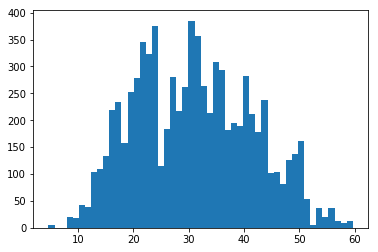

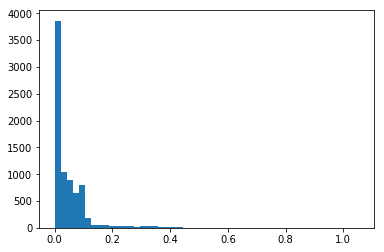

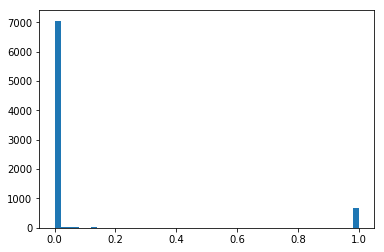

In [279]:
plt.hist(df_adjusted["retention_time"][~(np.isnan(df_adjusted["pep_new"]))], bins=50)
plt.show()

plt.hist(df_adjusted["pep"][~(np.isnan(df_adjusted["pep_new"]))], bins=50)
plt.show()

plt.hist(df_adjusted["pep_new"][~(np.isnan(df_adjusted["pep_new"]))], bins=50)
plt.show()

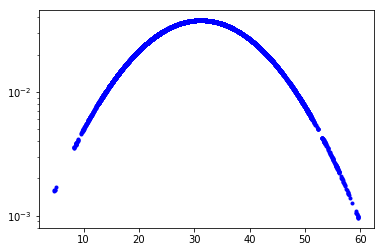

In [280]:
u_inds = ~(np.isnan(df_adjusted["pep_new"]))
plt.semilogy(df_adjusted["retention_time"][u_inds], df_adjusted["rt_minus"][u_inds], '.b')
plt.show()

In [175]:
print(norm.pdf([-3,-2,-1,0,1,2,3], loc=0, scale=0.1))

[1.47364613e-195 5.52094836e-087 7.69459863e-022 3.98942280e+000
 7.69459863e-022 5.52094836e-087 1.47364613e-195]


3.376076782598188


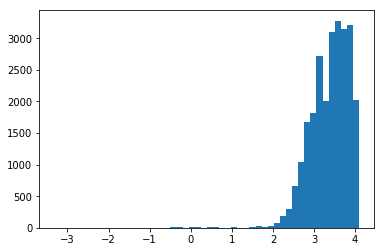

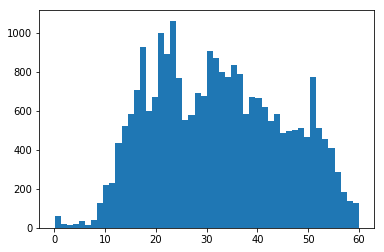

In [281]:
exp_dist = lognorm([sd_log_rt], loc=mean_log_rt)
print(mean_log_rt)
#exp_dist.pdf([0, mean_log_rt])
plt.hist(np.log(df_adjusted["retention_time"]), bins=50)
plt.show()
plt.hist(df_adjusted["retention_time"], bins=50)
plt.show()

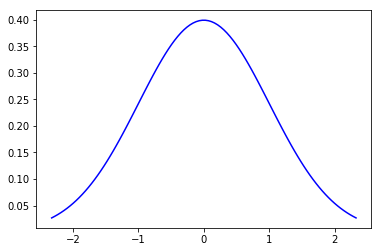

0.4953727559457317 3.378092670592023


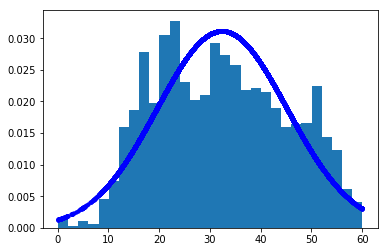

3.8007409622761097 5.730878642172099


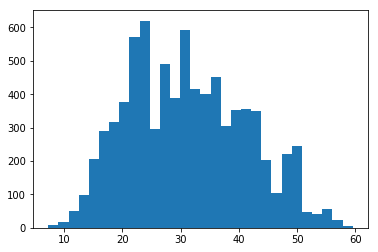

In [282]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), '-b')
plt.show()

#x = np.linspace(lognorm.ppf)
print(np.std(np.log(df_adjusted["retention_time"])), np.mean(np.log(df_adjusted["retention_time"])))
exp_dist = lognorm(sd_log_rt, loc=mean_log_rt)
#exp_dist = lognorm([np.std(df_adjusted["retention_time"])], loc=np.mean(df_adjusted["retention_time"]))
#plt.plot(np.linspace(1, 6, 100), exp_dist.pdf(np.linspace(1, 6, 100)), '-b')
#plt.plot(df_adjusted["retention_time"], exp_dist.pdf(df_adjusted["retention_time"]), '.b')
#plt.plot(np.log(df_adjusted["retention_time"]), exp_dist.pdf(np.log(df_adjusted["retention_time"])), '.b')
plt.plot(df_adjusted["retention_time"], 
         #lognorm.pdf(df_adjusted["retention_time"] - np.mean(df_adjusted["retention_time"]), 
         #            sd_log_rt) / np.exp(mean_log_rt), 
         norm.pdf(df_adjusted["retention_time"], 
                     loc=np.mean(df_adjusted["retention_time"]), 
                     scale=np.std(df_adjusted["retention_time"])),
         '.b')
plt.hist(df_adjusted["retention_time"], density=True, bins=30)
plt.show()

print(exp_dist.ppf(0.01), exp_dist.ppf(0.99))

plt.hist(df_adjusted["mu"][u_inds], bins=30)
plt.show()